# İş problemi;

- Teklonoji firmasında maaşları dayalı sonuçlarını etkileyen faktörler neler bunu problem olarak görüp bakalım.

##### Çalışma genel bakış:
   
   - Veriye ilk temas;
   1. İlk beş veri setine baktım.
   2. Verinin son beş veri setine baktım.
   3. Veri setinde genel bilgi.
   4. Veri indexlerine
   5. Verinin sayısal dağılımına bakıyorum.
   6. Verinin şekline 
   7. Verinin içinde boş veri varmı onun konrtölünü yapıyorum.
    
   - Veri Görselleştirmesi;
   1. Genel olarak bakiş veriye.
   2. Burda yıllık iş tecrübesinin kazanılan maaşlara etkisine bakıyorum.
   3. Cinsiyetin maaş üzerine etkisine bakalım.
   4. Genel olarak tek tabloda tüm verileri görmeye çalışalalım.
    
   -  Model kurma;
   1. Model Kurulması.
   2. Model sonuçlarını görselleştirme.
   3. Veri setinden rastgele veri seçip işlem yaptırma.
   
   - Etkileşimli hesaplama yapma.
   1. Kullanıcı etkileşimli gui yapılması.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\realb\Desktop\Teklonoji firmalarının çalışan durumlarını inceleme\data\employee_data.csv")

### Veriye ilk bakış

In [3]:
df.head()

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397


In [4]:
df.tail()

,ID,Gender,Experience (Years),Position,Salary
395,396,F,19,Cloud Solutions Architect,236045
396,397,F,20,Web Developer,182770
397,398,F,9,Network Administrator,85550
398,399,M,18,Database Administrator (DBA),129996
399,400,F,11,IT Security Analyst,169058


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   ID                  400 non-null    int64
 1   Gender              400 non-null    int32
 2   Experience (Years)  400 non-null    int64
 3   Position            400 non-null    int32
 4   Salary              400 non-null    int64
dtypes: int32(2), int64(3)
memory usage: 12.6 KB


In [74]:
df.columns

Index(['ID', 'Gender', 'Experience (Years)', 'Position', 'Salary'], dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,400.0,200.5000,115.614301,1.0,100.75,200.5,300.25,400.0
Experience (Years),400.0,9.6700,6.101571,0.0,4.00,10.0,15.00,20.0
Salary,400.0,131701.1975,43351.508990,43643.0,100484.75,128561.5,157735.00,269950.0


In [7]:
df.shape

(400, 5)

In [9]:
df.isnull().sum()

ID                    0
Gender                0
Experience (Years)    0
Position              0
Salary                0
dtype: int64

### Veri görselleştirmesi yapma

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [23]:
warnings.filterwarnings("ignore")

##### 1. Genel olarak bakiş veriye

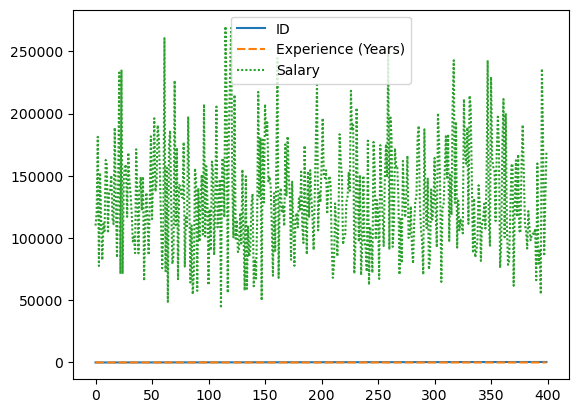

In [12]:
# Genel olarak veriye bir görselleştirme yapıyorum burda amacım nasıl ve nerden başlayaçığımı bulma.

sns.lineplot(df);

##### 2. Burda yıllık iş tecrübesinin kazanılan maaşlara etkisine bakıyorum.

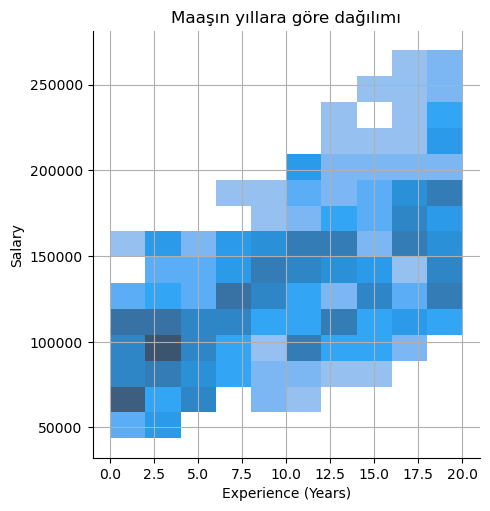

In [25]:
# Yıllık deneyim artınca maşın artış miktarı.

sns.displot(x="Experience (Years)", y="Salary", data=df);
plt.title("Maaşın yıllara göre dağılımı");
plt.grid(True);

##### Deneyim yıllarına göre genel yorumlama.

- Burda yıllık deneyim üzerinden değerlendirme yapılacak.
1. İş tercübesi artınca evet kazanılan maaş artıyor bu basit bilgiyi verilerle ortaya koymuş olduk.
2. Ama burda Bazı ilginç durumlar var 20 yıllık tercübe olmasına rağmen maaşlarda belirgin bir artış gözenlemiş buranın alt kırılımlarına bakmak gerekiyor.

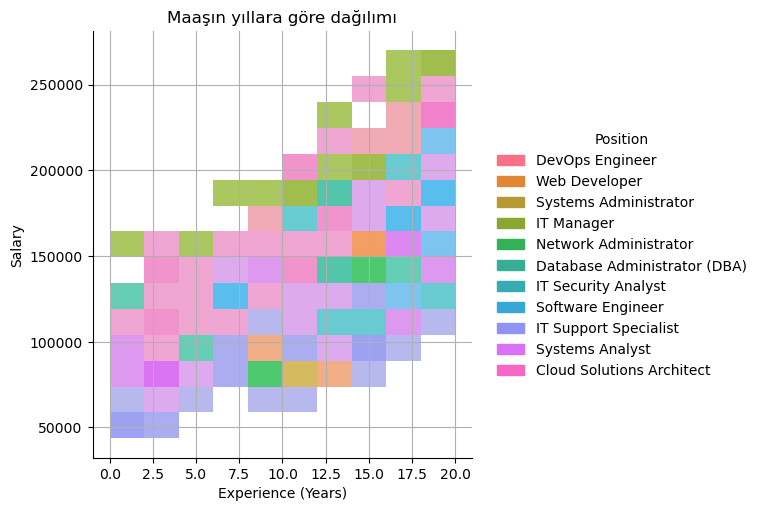

In [28]:
# Burda iş yerindeki departman ve orda yapılan farklı işlere göre dağılımı üzerinden bakalım.

sns.displot(x="Experience (Years)", y="Salary", hue = "Position", data=df);
plt.title("Maaşın yıllara göre dağılımı");
plt.grid(True);

##### Deneyim yılları ve iş pozisyonu acısından değerlendirme.

- Burda işlerin pozisyon ve iş tecrübesine göre ele almış durumdayım.

1. Veri burda alt kırılmarı dailinde daha anlaşılır oluyor. Tecrübe artığın tüm bölümlerki maaş artış söz konusu değil.
2. Burda IT Maneger olup ve 20 yıllık iş tecrübeniz olduğunda evet 250 bin ve üsttü kazanılması muhtemel. Ama 20 yıllık tecrübe sahibi olsanız bile IT SUPPORT SPECİALİST olduğunuzda 20 yıllık zaman yüksek maaş kazanamamişlar. Hatta 2.5 yıl deneyimi olan Clod Solutions Architect kadar kazanılmış. Burda eğer kariyer seçiminde para ilk tercihiniz ise bu bir sonuç. Yine başka bir durum var oda aslında bu işe verilen para az olması sektörde bu alanda çalışan çok kişi olduğunu gösterir temelde arz taleb dengesi.
3. Eğer IT maneger olrak bir kariyer düşünüyorsanız sektördeki 2.5 yılında 150 bin üzeri kazanabilirsiniz.

##### 3. Cinsiyetin maaş üzerine etkisine bakalım.

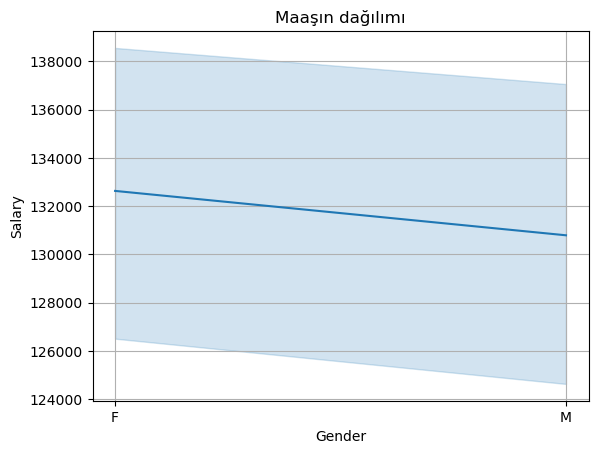

In [31]:
# Kabaca cinsiyetin maaş durumundaki dağılımına bakalım.

sns.lineplot(x="Gender", y="Salary", data=df);
plt.title("Maaşın dağılımı");
plt.grid(True);

##### Cinsiyet üzerinde maaş dağılımı acısından değerlendirme. Ve çok ilginç.

Sadece cinsiyet ve kazanılan para üzerinden değerleirme yaptım.

Olası Değerler: 'M' (Erkek), 'F' (Kadın)
Örnek: 'M', 'F'

1. Evet Burda sizinde benim gibi şaşkın olduğunuzu düşünüyorum. Genel bilinenin aksine erkekler kadınlardan daha fazla kazanmıyormuş.
2. erkekler kadınlardan daha az kazanıyormuş. Burdan şu yorumları yapabiliriz.
- Sektörde kadın sayısı daha az ve buna bağlı kadın çalıştırmkak isteyen firmalar kadınlara daha fazla para vereyor.
- Sektörde kadınlar daha kalifiyeli iş yapıyor ve daha fazla kazanıyor.
- Son olarak kadınlar sektörde firma politikası neticesinde daha fazla para kazanıyor şimidi bunu alt kırımlarına bakarak inceleyelim.

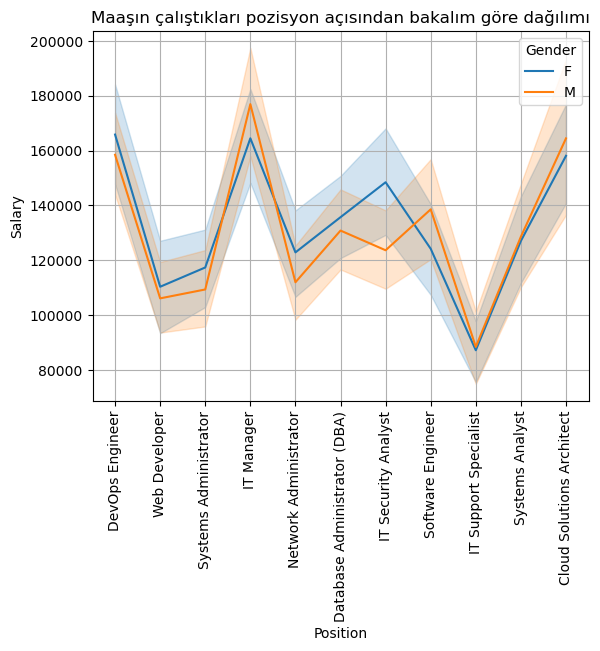

In [33]:
# Kabaca cinsiyetin maaş durumundaki dağılımına bakalım.

sns.lineplot(x="Position", y="Salary", hue = "Gender",data=df);
plt.title("Maaşın çalıştıkları pozisyon açısından bakalım göre dağılımı");
plt.xticks(rotation = 90)
plt.grid(True);

##### Cinsiyetin farklı pzisyonlardaki maaş kazanma ve buna dağlı dağılımı. İlginç.

- Burda cinsiyet ve iş pozisyonu açısından ele aldım.

1. Bir üstteki grafikte kadınların bilinenin aksin daha fazla kazandığını görmüştük. Burda bunun sebebi görünüyor gibi. It menager pozisyon daha önceki grafiklerde en fazla kazanan pozisyon gibi görünmekteydi ve buna bağlı olarak o pozisyonda çalışan kişilerin cinsiyetlerinin hangi taraf açısından çokluğu cinsiyetteki kara kazanımılını doğrudan etkileşim. Bu pozisyon en fazla kazanan ve orda kadınların erkeklerden daha fazla olmaı örneklem üzerinde kadınların daha fazla para kazandığına göre yapmamıza neden oldu bir üsteki grafikte.
2. Hatta en fazla kazanan üç pozisyonlarda kadın çalışan sayısı erkek çalışan sayısından daha fazla DevOps Engineer, It maneger ve Cloud Solutions Architect Bu alanlarda çalışan kişiler daha fazla kadın ağırlığında.
3. Bu bize bir sonuç doğurabiliriyor eğer para odaklı bakarak bu işlere yaklaşırsan kadın çalışanların çalıştıkları pozisyon tercihleri erkeklere göre daha doğru.

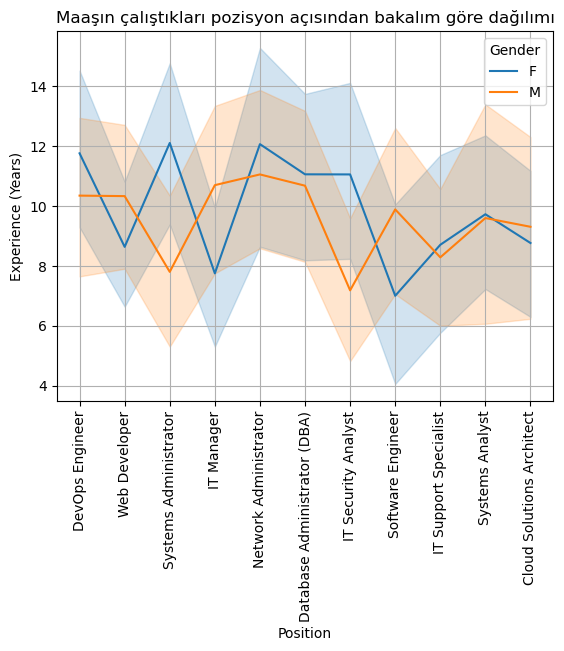

In [35]:
# Yine cinsiyeti hedef alan ama işlerdeki deneyimede bakalım.

sns.lineplot(x="Position", y="Experience (Years)", hue = "Gender",data=df);
plt.title("Maaşın çalıştıkları pozisyon açısından bakalım göre dağılımı");
plt.xticks(rotation = 90)
plt.grid(True);

##### Sonuçlar daha anlaşılır olmaya balşadı 

- Maaşı yüksek olan bölümlere bakalım.

1. It maneger bu alanda kadınların daha fazla olduğunu görmüştük çünki kadınların daha fazla deneyim sahibi olduğunu açıkça görüyoruz buda bu alanlarda kadın çalışanların daha fazla olmasını açıklıyor.
2. DevOps Engineer Bu alanda erkek çalışanların deneyim yılı kadın çalışanlardan daha fazla ama görünen o ki bu alanda kadınlar daha fazla çalışıyor o nedenle bu alanda çalışan erkeklerin bir yerde kadınlara göre daha az başarılı olduğu anlamına gelebilir. (Tabi bu bir şirket verisi değil ise.)
3.  Cloud Solutions Architect Bu alandada kadınların daha fazla deneyim yılı olduğu ve buna bağlı daha fazla kadın olduğu anlamına gelebilir.

### 4. Genel olarak tek tabloda tüm verileri görmeye çalışalaım.

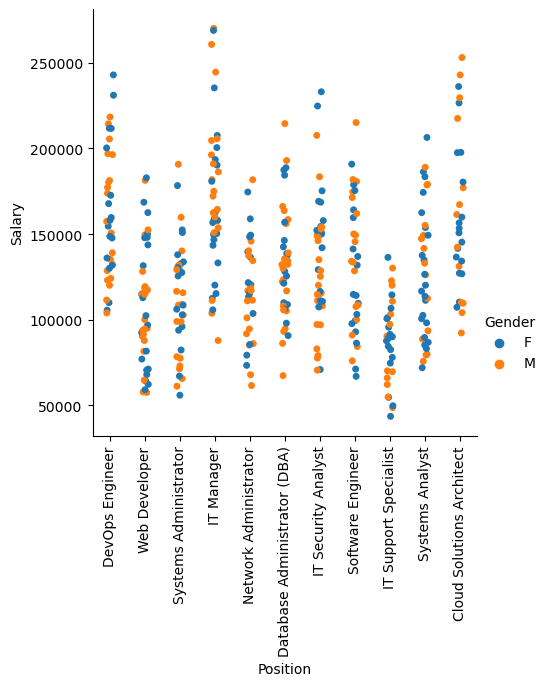

In [41]:
sns.catplot(x = "Position", y = "Salary", hue= "Gender", data = df);
plt.xticks(rotation = 90);

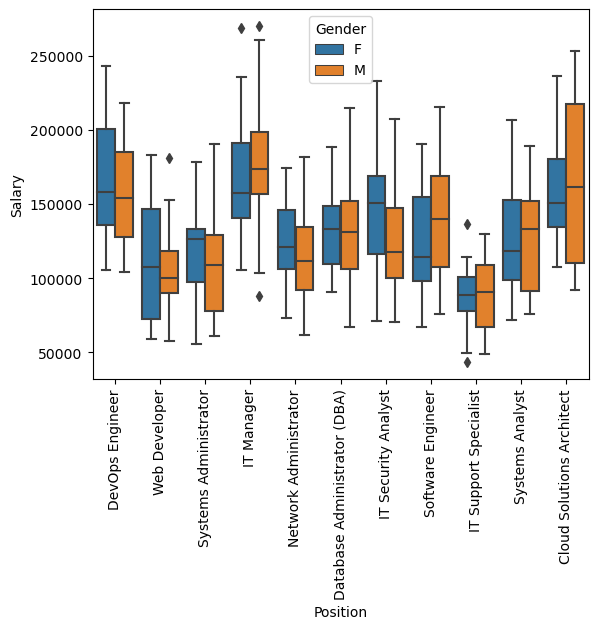

In [42]:
sns.boxplot(x = "Position", y = "Salary", hue= "Gender", data = df);
plt.xticks(rotation = 90);

##### Verilerin dağılımı üzerinden yorumlama yapalım.

- Buda genel dağılım üzerinden konuşalım.

1. İlk dikkatimi çeken şu erkeklerin standart sapması maaş alanında daha yüksek dadınlara oranla. Bir pozisyonda en fazla alanda erkek en az alanda erkek gibi sonuçlar var.
2. Kadınların standart sapması daha düşük bu şu soruya cevap oluyor olabiliyor hangi cinsiyete mensup çalışanlar işini daha titiz yapıyor. Ve sonuçta verilen maaş kişinin kabiliyetleri sonuçunda ise kadınların erkeklere oranla daha titiz olma durumu gözlemlenebilir.

### Model kurma

##### Burda maaş hedef değişken alıp kişilerin maaş tahmin etmesini sağlayan bir model kuralım.

##### 1. Model kurulması.

In [43]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
# Index(['ID', 'Gender', 'Experience (Years)', 'Position', 'Salary'], dtype='object')


# Kategorik verileri sayısal verilere dönüştürün
label_encoders = {}
for column in ['Gender', 'Experience (Years)', 'Position']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Özellikleri ve hedefi ayırın
X = df.drop(['Salary', 'ID'], axis=1)
y = df['Salary']

# Veriyi eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri ölçeklendirin
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# Modeli oluşturun
model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),  # Daha fazla nöron
    Dropout(0.3),  # Dropout oranını artırma
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

# Modeli derleyin
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Erken durdurma callback'ini tanımlayın
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)  # Patience değerini artırma

# Modeli eğitin
history = model.fit(
    X_train, y_train,
    epochs=300,  # Epoch sayısını artırma
    batch_size=64,  # Batch size'ı artırma
    validation_split=0.1,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/300
5/5 [==============================] - 1s 32ms/step - loss: 19176179712.0000 - mae: 131250.0781 - mse: 19176179712.0000 - val_loss: 18609541120.0000 - val_mae: 131911.4688 - val_mse: 18609541120.0000
Epoch 2/300
5/5 [==============================] - 0s 7ms/step - loss: 19176003584.0000 - mae: 131249.3906 - mse: 19176003584.0000 - val_loss: 18609332224.0000 - val_mae: 131910.6875 - val_mse: 18609332224.0000
Epoch 3/300
5/5 [==============================] - 0s 7ms/step - loss: 19175727104.0000 - mae: 131248.3281 - mse: 19175727104.0000 - val_loss: 18608979968.0000 - val_mae: 131909.3438 - val_mse: 18608979968.0000
Epoch 4/300
5/5 [==============================] - 0s 9ms/step - loss: 19175282688.0000 - mae: 131246.6562 - mse: 19175282688.0000 - val_loss: 18608394240.0000 - val_mae: 131907.1406 - val_mse: 18608394240.0000
Epoch 5/300
5/5 [==============================] - 0s 7ms/step - loss: 19174574080.0000 - mae: 131243.9844 - mse: 19174574080.0000 - val_loss: 18607464448.

Epoch 40/300
5/5 [==============================] - 0s 7ms/step - loss: 12654968832.0000 - mae: 105256.2812 - mse: 12654968832.0000 - val_loss: 11828899840.0000 - val_mae: 104267.5469 - val_mse: 11828899840.0000
Epoch 41/300
5/5 [==============================] - 0s 7ms/step - loss: 12038916096.0000 - mae: 102349.4688 - mse: 12038916096.0000 - val_loss: 11158652928.0000 - val_mae: 101121.4141 - val_mse: 11158652928.0000
Epoch 42/300
5/5 [==============================] - 0s 7ms/step - loss: 11334697984.0000 - mae: 98976.9062 - mse: 11334697984.0000 - val_loss: 10461771776.0000 - val_mae: 97742.2031 - val_mse: 10461771776.0000
Epoch 43/300
5/5 [==============================] - 0s 7ms/step - loss: 10606992384.0000 - mae: 95638.8828 - mse: 10606992384.0000 - val_loss: 9750325248.0000 - val_mae: 94162.0547 - val_mse: 9750325248.0000
Epoch 44/300
5/5 [==============================] - 0s 7ms/step - loss: 9882341376.0000 - mae: 92020.6016 - mse: 9882341376.0000 - val_loss: 9018746880.0000 -

Epoch 80/300
5/5 [==============================] - 0s 7ms/step - loss: 1192563840.0000 - mae: 28115.7285 - mse: 1192563840.0000 - val_loss: 882636736.0000 - val_mae: 24359.6172 - val_mse: 882636736.0000
Epoch 81/300
5/5 [==============================] - 0s 7ms/step - loss: 1218265344.0000 - mae: 28634.5273 - mse: 1218265344.0000 - val_loss: 882693120.0000 - val_mae: 24361.3906 - val_mse: 882693120.0000
Epoch 82/300
5/5 [==============================] - 0s 7ms/step - loss: 1233249792.0000 - mae: 28343.9355 - mse: 1233249792.0000 - val_loss: 883868032.0000 - val_mae: 24367.7266 - val_mse: 883868032.0000
Epoch 83/300
5/5 [==============================] - 0s 7ms/step - loss: 1267104256.0000 - mae: 28519.7266 - mse: 1267104256.0000 - val_loss: 884893440.0000 - val_mae: 24374.6426 - val_mse: 884893440.0000
Epoch 84/300
5/5 [==============================] - 0s 7ms/step - loss: 1269851904.0000 - mae: 28735.0039 - mse: 1269851904.0000 - val_loss: 885405184.0000 - val_mae: 24380.1816 - val_

5/5 [==============================] - 0s 7ms/step - loss: 1218646912.0000 - mae: 28224.4609 - mse: 1218646912.0000 - val_loss: 857304832.0000 - val_mae: 24068.0508 - val_mse: 857304832.0000
Epoch 121/300
5/5 [==============================] - 0s 7ms/step - loss: 1172223104.0000 - mae: 27547.2891 - mse: 1172223104.0000 - val_loss: 857552960.0000 - val_mae: 24067.0547 - val_mse: 857552960.0000
Epoch 122/300
5/5 [==============================] - 0s 7ms/step - loss: 1180064640.0000 - mae: 27724.1660 - mse: 1180064640.0000 - val_loss: 856519488.0000 - val_mae: 24031.1270 - val_mse: 856519488.0000
Epoch 123/300
5/5 [==============================] - 0s 7ms/step - loss: 1217370496.0000 - mae: 28352.9688 - mse: 1217370496.0000 - val_loss: 857695488.0000 - val_mae: 24050.7461 - val_mse: 857695488.0000
Epoch 124/300
5/5 [==============================] - 0s 7ms/step - loss: 1198745856.0000 - mae: 27581.5234 - mse: 1198745856.0000 - val_loss: 858882752.0000 - val_mae: 24066.4082 - val_mse: 8588

In [49]:
# Test verisi ile tahmin yapın
y_pred = model.predict(X_test).flatten()  # y_pred bir numpy dizisi olmalıdır

# Performans metriklerini hesaplayın
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Ortalama Mutlak Hata (MAE): {mae}")
print(f"Ortalama Kareler Hata (MSE): {mse}")
print(f"Karekök Ortalama Kareler Hata (RMSE): {rmse}")
print(f"R^2 Skoru: {r2}")

3/3 [==============================] - 0s 1ms/step
Ortalama Mutlak Hata (MAE): 23165.52265625
Ortalama Kareler Hata (MSE): 767001552.7758011
Karekök Ortalama Kareler Hata (RMSE): 27694.79288198056
R^2 Skoru: 0.589407346942321


##### 2. Model sonuçlarını görselleştirme.

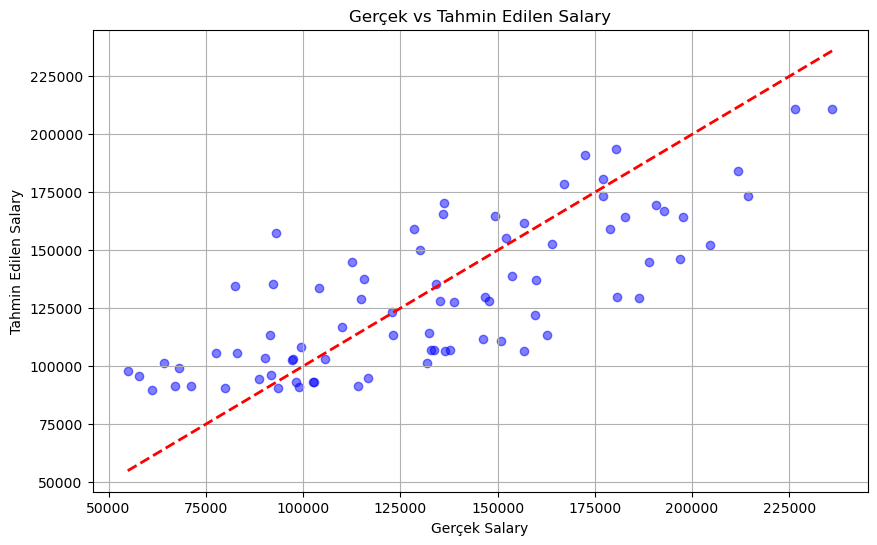

In [56]:
# Gerçek ve tahmin edilen GPA'ları karşılaştıran bir dağılım grafiği oluşturun
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # Y = X doğrusu
plt.xlabel('Gerçek Salary')
plt.ylabel('Tahmin Edilen Salary')
plt.title('Gerçek vs Tahmin Edilen Salary')
plt.grid(True)
plt.show()

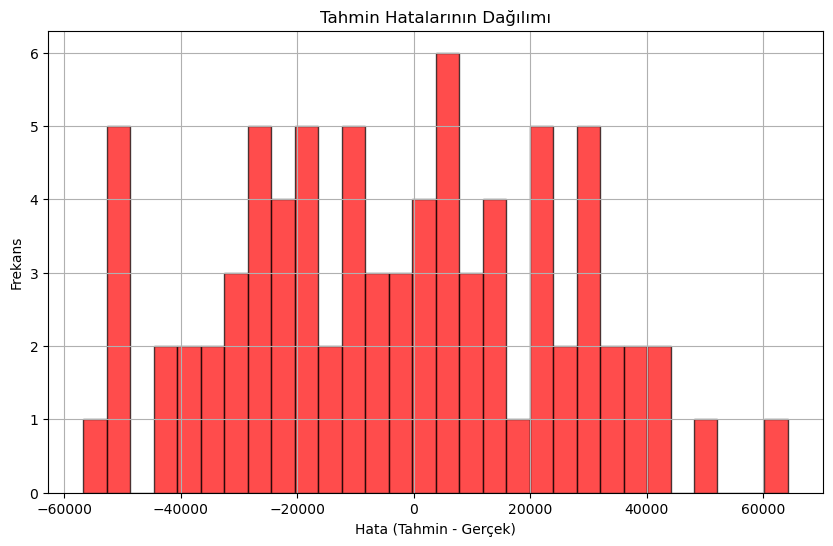

In [57]:
# Hataları hesaplayın
errors = y_pred - y_test

# Hataların histogramı
plt.figure(figsize=(10, 6))

plt.hist(errors, bins=30, color='red', edgecolor='black', alpha=0.7)
plt.xlabel('Hata (Tahmin - Gerçek)')
plt.ylabel('Frekans')
plt.title('Tahmin Hatalarının Dağılımı')
plt.grid(True)
plt.show()

##### 3. Veri setinden rastgele veri seçip işlem yaptırma.

In [59]:
##### Veri içinden rastgele veri seçtirip işlem yaptıralım.

# Veri setinden rastgele bir örnek seçin (örneğin 10. indeks)
index = 1
sample_data = X_test[index].reshape(1, -1)  # Test verisi içindeki örneği seçin

# Tahmin yapın
predicted_gpa = model.predict(sample_data)[0][0]
actual_gpa = y_test.iloc[index]

print(f"Seçilen Veri İndeksi: {index}")
print(f"Gerçek Salary: {actual_gpa}")
print(f"Tahmin Edilen Salary: {predicted_gpa}")

1/1 [==============================] - 0s 14ms/step
Seçilen Veri İndeksi: 1
Gerçek Salary: 91842
Tahmin Edilen Salary: 96214.890625


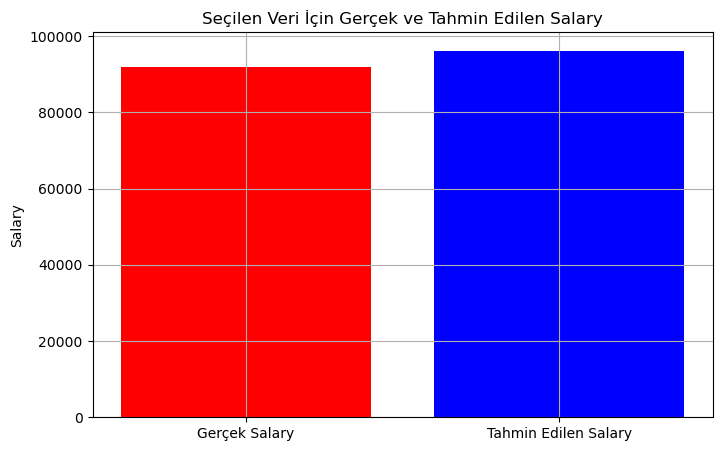

In [64]:
# Gerçek ve tahmin edilen GPA değerlerini bar grafiği ile görselleştirin
plt.figure(figsize=(8, 5))

labels = ['Gerçek Salary', 'Tahmin Edilen Salary']
values = [actual_gpa, predicted_gpa]

plt.bar(labels, values, color=['red', 'Blue'])
plt.ylabel('Salary')
plt.title('Seçilen Veri İçin Gerçek ve Tahmin Edilen Salary')
plt.grid(True)
plt.show()

### Etkileşimli hesaplama yapmak

##### 1. Kullanıcı etkileşimli gui yapılması.

In [69]:
import tkinter as tk
from tkinter import ttk

In [79]:


# Tkinter penceresini oluşturun
root = tk.Tk()
root.title("Maaş Tahmin Uygulaması")

def predict_salary():
    try:
        # Kullanıcıdan veri alın
        gender = int(gender_var.get())
        experience = int(experience_entry.get())
        position = major_map[position_var.get()]
        
        # Veriyi modelle tahmin yapacak şekilde dönüştürün
        input_data = np.array([[gender, experience, position]])
        input_data = scaler.transform(input_data)

        # Tahmini yapın
        salary_prediction = model.predict(input_data)

        # Sonucu göster
        result_label.config(text=f"Tahmin Edilen Maaş: ${salary_prediction[0][0]:.2f}")
    except Exception as e:
        result_label.config(text=f"Hata: {e}")

# Pozisyonlar için bir map oluşturduk
major_map = {
    'IT Manager': 0,
    'Software Engineer': 1,
    'Network Administrator': 2,
    'Systems Administrator': 3,
    'Database Administrator (DBA)': 4,
    'Web Developer': 5,
    'IT Support Specialist': 6,
    'Systems Analyst': 7,
    'IT Security Analyst': 8,
    'DevOps Engineer': 9,
    'Cloud Solutions Architect': 10
}

# Arayüz elemanlarını oluşturun
gender_var = tk.StringVar(value="0")
position_var = tk.StringVar(value="IT Manager")

# Cinsiyet
tk.Label(root, text="Cinsiyet (0=Kadın, 1=Erkek):").grid(row=0, column=0)
tk.Entry(root, textvariable=gender_var).grid(row=0, column=1)

# Deneyim
tk.Label(root, text="Deneyim (Yıl):").grid(row=1, column=0)
experience_entry = tk.Entry(root)
experience_entry.grid(row=1, column=1)

# Pozisyon
tk.Label(root, text="Pozisyon:").grid(row=2, column=0)
position_menu = tk.OptionMenu(root, position_var, 
    'IT Manager', 'Software Engineer', 'Network Administrator',
    'Systems Administrator', 'Database Administrator (DBA)',
    'Web Developer', 'IT Support Specialist', 'Systems Analyst',
    'IT Security Analyst', 'DevOps Engineer', 'Cloud Solutions Architect'
)
position_menu.grid(row=2, column=1)

# Tahmin Butonu
tk.Button(root, text="Maaş Tahmin Et", command=predict_salary).grid(row=3, column=0, columnspan=2)

# Sonuç Label
result_label = tk.Label(root, text="Tahmin Edilen Maaş: ")
result_label.grid(row=4, column=0, columnspan=2)

root.mainloop()

1/1 [==============================] - 0s 14ms/step
